In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'meter_labels.csv', 'meter_image.zip', 'meter_image']


In [39]:
!unzip '/content/input/meter_image.zip' -d '/content/input/meter_image'

Archive:  /content/input/meter_image.zip
replace /content/input/meter_image/058.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/input/meter_image/058.jpg  
replace /content/input/meter_image/059.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/input/meter_image/059.jpg  
  inflating: /content/input/meter_image/060.jpg  
  inflating: /content/input/meter_image/061.jpg  
  inflating: /content/input/meter_image/062.jpg  
  inflating: /content/input/meter_image/063.jpg  
  inflating: /content/input/meter_image/064.jpg  
  inflating: /content/input/meter_image/065.jpg  
  inflating: /content/input/meter_image/066.jpg  
  inflating: /content/input/meter_image/067.jpg  
  inflating: /content/input/meter_image/068.jpg  
  inflating: /content/input/meter_image/069.jpg  
  inflating: /content/input/meter_image/070.jpg  
  inflating: /content/input/meter_image/071.jpg  
  inflating: /content/input/meter_image/072.jpg  
  inflating: /content/input/meter_image/0

In [ ]:
!pip list


In [64]:
import os
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
images=os.listdir("./input/meter_image/")
image_set=[]

for i in range(600):
  pp=58
  for img in images:
    
    p=str(i).rjust(3,'0')+'.jpg'
    if(img==p):
      print(img)
      image=Image.open(os.path.join("./input/meter_image/",img))
      image = image.convert("L")
      image=image.resize((480,640),Image.ANTIALIAS)
      image=np.asarray(image)
      image_set.append(image)
  pp=pp+1
  
image_set=np.asarray(image_set)
Pface=image_set
# Pface=np.moveaxis(image_set,1,0)
# Pface=np.transpose(image_set,[2,1,0])
print(Pface.shape)
print(type(image_set))

058.jpg
059.jpg
060.jpg
061.jpg
062.jpg
063.jpg
064.jpg
065.jpg
066.jpg
067.jpg
068.jpg
069.jpg
070.jpg
071.jpg
072.jpg
073.jpg
074.jpg
075.jpg
076.jpg
077.jpg
078.jpg
079.jpg
080.jpg
081.jpg
082.jpg
083.jpg
084.jpg
085.jpg
086.jpg
087.jpg
088.jpg
089.jpg
090.jpg
091.jpg
092.jpg
093.jpg
094.jpg
095.jpg
096.jpg
097.jpg
098.jpg
099.jpg
100.jpg
101.jpg
102.jpg
103.jpg
104.jpg
105.jpg
106.jpg
107.jpg
108.jpg
109.jpg
110.jpg
111.jpg
112.jpg
113.jpg
114.jpg
115.jpg
116.jpg
117.jpg
118.jpg
119.jpg
120.jpg
121.jpg
122.jpg
123.jpg
124.jpg
125.jpg
126.jpg
127.jpg
128.jpg
129.jpg
130.jpg
131.jpg
132.jpg
133.jpg
134.jpg
135.jpg
136.jpg
137.jpg
138.jpg
139.jpg
140.jpg
141.jpg
142.jpg
143.jpg
144.jpg
145.jpg
146.jpg
147.jpg
148.jpg
149.jpg
150.jpg
151.jpg
152.jpg
153.jpg
154.jpg
155.jpg
156.jpg
157.jpg
158.jpg
159.jpg
160.jpg
161.jpg
162.jpg
163.jpg
164.jpg
165.jpg
166.jpg
167.jpg
168.jpg
169.jpg
170.jpg
171.jpg
172.jpg
173.jpg
174.jpg
175.jpg
176.jpg
177.jpg
178.jpg
179.jpg
180.jpg
181.jpg
182.jpg


In [65]:
# load the dataset

# Pface = np.moveaxis(np.load('./input/face_images.npz')['face_images'],-1,0)

# print(np.load('./input/face_images.npz')['face_images'].shape)

# LMs = pd.read_csv('./input/facial_keypoints.csv')
LMs = pd.read_csv('./input/meter_labels.csv')
LMpos=np.array(LMs.columns.tolist())
print(LMs.isnull().sum())

zerox        0
zeroy        0
centerx      0
centery      0
needle1x    17
needle1y    17
needle2x    21
needle2y    21
dtype: int64


In [66]:
#    file.write('zerox,zeroy,centerx,centery,needle1x,needle1y,needle2x,needle2y'+"\n")
iselect=list(LMs.zerox.notna() & LMs.centerx.notna() &
        LMs.needle1x.notna() & LMs.needle2x.notna())
print(len(iselect))

iselect=np.nonzero(iselect)[0]
# iselect=np.nonzero(list(LMs.left_eye_center_x.notna() & LMs.right_eye_center_x.notna() &
#          LMs.nose_tip_x.notna() & LMs.mouth_center_bottom_lip_x.notna()))[0]
print(len(iselect),iselect)
# iselect=np.nonzero(aa)[0]
Spic=Pface.shape[1]
m=len(iselect)
X=np.zeros((m,640,480,1))
Y=np.zeros((m,8))
print(Pface.shape)
Spicx=480
Spicy=640
X[:,:,:,0]=Pface[iselect,:,:]/255.0
Y[:,0]=LMs.zerox[iselect]/Spicx
Y[:,1]=LMs.zeroy[iselect]/Spicy
Y[:,2]=LMs.centerx[iselect]/Spicx
Y[:,3]=LMs.centery[iselect]/Spicy
Y[:,4]=LMs.needle1x[iselect]/Spicx
Y[:,5]=LMs.needle1y[iselect]/Spicy
Y[:,6]=LMs.needle2x[iselect]/Spicx
Y[:,7]=LMs.needle2y[iselect]/Spicy

print('# selected images = %d' %(m))

466
445 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 116 117 118 119 121 122 123 124 125 127 128 129 130
 131 132 133 134 135 136 137 138 139 140 141 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 177 178 179 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 211 212 213 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 25

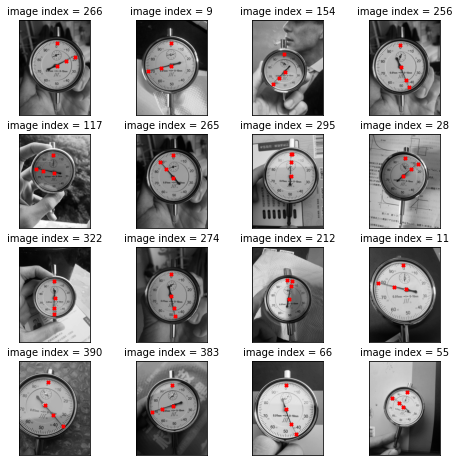

In [67]:
import matplotlib.pyplot as plt

n = 0
nrows = 4
ncols = 4
irand=np.random.choice(Y.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(X[irand[n],:,:,0], cmap='gray')
        ax[row,col].scatter(Y[irand[n],0::2]*Spicx,Y[irand[n],1::2]*Spicy,marker='X',c='r',s=10)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
        n += 1


In [68]:
# Split the dataset
from sklearn.model_selection import train_test_split

random_seed=21
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1, random_state=random_seed)
print(Xtrain.shape)


(400, 640, 480, 1)


In [ ]:
/////////////////////////////////////////////////////////////

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(filters= 32, kernel_size=(3,3), padding='Same', activation='relu',input_shape=(640,480,1)))
model.add(Conv2D(filters= 32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

# 随机丢弃四分之一的网络连接，防止过拟合
model.add(Dropout(0.25))  
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='Same', activation='relu'))

model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# 全连接层,展开操作，
model.add(Flatten())
# 添加隐藏层神经元的数量和激活函数
model.add(Dense(128, activation='relu'))    
model.add(Dropout(0.25))
# 输出层
model.add(Dense(8, activation='sigmoid')) 

# model.add(Conv2D(32, (3, 3), padding = 'same', activation='tanh', input_shape=(640,480, 1)))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128,activation='tanh'))
# model.add(Dropout(0.5))
# model.add(Dense(8, activation='sigmoid'))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd)
print(model.summary())
model.fit(Xtrain, Ytrain, batch_size=5, epochs=50, validation_data = (Xtest, Ytest), verbose = 1)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 640, 480, 32)      320       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 640, 480, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 213, 160, 32)      0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 213, 160, 32)      0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 213, 160, 64)      18496     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 213, 160, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 106, 80, 64)     

Text(0.5, 0.98, 'x: Manual; +: CNN')

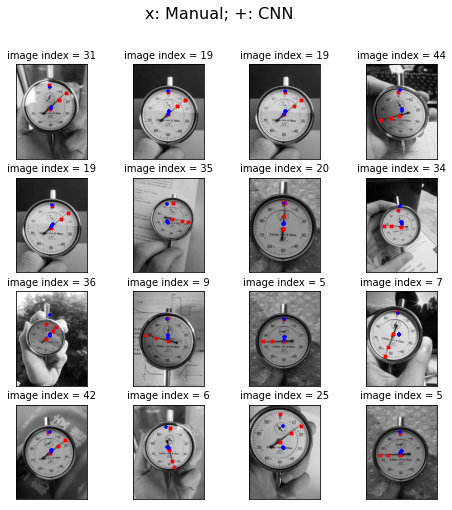

In [72]:
Ytrain_pred = model.predict(Xtrain)
Ytest_pred = model.predict(Xtest)

n = 0
nrows = 4
ncols = 4
irand=np.random.choice(Ytest.shape[0],nrows*ncols)
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True,figsize=[ncols*2,nrows*2])
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow(Xtest[irand[n],:,:,0], cmap='gray')

        ax[row,col].scatter(Ytest[irand[n],0::2]*Spicx,Ytest[irand[n],1::2]*Spicy,marker='X',c='r',s=10)
        ax[row,col].scatter(Ytest_pred[irand[n],0::2]*Spicx,Ytest_pred[irand[n],1::2]*Spicy,marker='+',c='b',s=10)
        ax[row,col].set_xticks(())
        ax[row,col].set_yticks(())
        ax[row,col].set_title('image index = %d' %(irand[n]),fontsize=10)
        n += 1
plt.suptitle('x: Manual; +: CNN', fontsize=16)